<a href="https://colab.research.google.com/github/RobinCC95/AnalisisDatosPhone/blob/main/parcialSisitemasIntelII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# parcial I : Human Activity Recognition on Smartphones for Mobile Context Awareness

descripcon aqui

# Tratamiendo de los datos

importar todas la librerias necesarias

In [ ]:
#Calculos matemáticos y matrices
import numpy as np
import pandas as pd
#Dibujo gráficas
import matplotlib.pyplot as plt
from google.colab import files
import io
from google.colab import drive
drive.mount('/content/drive')
#librerias modelos
from matplotlib import colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
#Importación knn
from sklearn.neighbors import KNeighborsClassifier
#Importación grafica de matriz de confusión
import seaborn as sns
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS

Mounted at /content/drive


cargar datos del dataset 

In [ ]:
#url de las etiquetas
etiquetas_X_url = "/content/drive/MyDrive/datasets/HAPT Data Set/features.txt"
etiquetas_y_url = "/content/drive/MyDrive/datasets/HAPT Data Set/activity_labels.txt"
X_test_url = '/content/drive/MyDrive/datasets/HAPT Data Set/Test/X_test.txt'
y_test_url = '/content/drive/MyDrive/datasets/HAPT Data Set/Test/y_test.txt'
X_train_url = '/content/drive/MyDrive/datasets/HAPT Data Set/Train/X_train.txt'
y_train_url = '/content/drive/MyDrive/datasets/HAPT Data Set/Train/y_train.txt'

#cargar los datos en las variables correspondientes
with open(etiquetas_X_url) as f:
  archivo = f.read()
etiquetas_X = np.array(archivo.split('\n'))
#eliminamos ultimo dato vacio
etiquetas_X = np.delete(etiquetas_X, -1)
#quitamos espacios de las etiquetas
etiquetas_X = np.char.strip(etiquetas_X)

with open(etiquetas_y_url) as f:
  archivo = f.read()
etiquetas_y = np.array(archivo.split('\n'))
#eliminamos ultimo dato vacio
etiquetas_y = np.delete(etiquetas_y, -1)
#quitamos espacios de las etiquetas
etiquetas_y = np.char.strip(etiquetas_y)

with open(X_test_url) as f:
  archivo = f.readlines()
X_test = pd.read_csv(X_test_url, delimiter=' ')
# Adiciono los labels a las columnas
X_test.columns = etiquetas_X

with open(y_test_url) as f:
  archivo = f.readlines()
y_test = pd.read_csv(y_test_url, delimiter=' ')
# label de columna
y_test.columns = ["class"]

with open(X_train_url) as f:
  archivo = f.readlines()
X_train = pd.read_csv(X_train_url, delimiter=' ')
# X_train.shape
X_train.columns = etiquetas_X

with open(y_train_url) as f:
  archivo = f.readlines()
y_train = pd.read_csv(y_train_url, delimiter=' ')
# Adiciono los labels a las columnas
y_train.columns = ["class"]


## tratamiento de la informacion

Se agrupa los datos de salida de cada clase para ver la cantidad de registro por cada una.

In [ ]:
print(etiquetas_y)
print("datos de entrenamiento")
print(y_train.groupby("class").size())
print("datos de pruebas")
print(y_test.groupby("class").size())

['1 WALKING' '2 WALKING_UPSTAIRS' '3 WALKING_DOWNSTAIRS' '4 SITTING'
 '5 STANDING' '6 LAYING' '7 STAND_TO_SIT' '8 SIT_TO_STAND' '9 SIT_TO_LIE'
 '10 LIE_TO_SIT' '11 STAND_TO_LIE' '12 LIE_TO_STAND']
datos de entrenamiento
class
1     1226
2     1073
3      987
4     1293
5     1422
6     1413
7       47
8       23
9       75
10      60
11      90
12      57
dtype: int64
datos de pruebas
class
1     496
2     471
3     420
4     508
5     555
6     545
7      23
8      10
9      32
10     25
11     49
12     27
dtype: int64


In [ ]:
colormap = plt.cm.coolwarm
plt.figure(figsize=(60,50))
plt.title('Correlation of Features', y=1.05, size=15)
# etiquetas_X
sb.heatmap(X_test.astype(float).corr(),linewidths=0.1,vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True)


<Axes: title={'center': 'Correlation of Features'}>

Se puede observar que se tiene un desvalance en los datos de las clases 7 hasta la 12 que tienen que ver respectivamente con '7 STAND_TO_SIT' '8 SIT_TO_STAND' '9 SIT_TO_LIE' '10 LIE_TO_SIT' '11 STAND_TO_LIE' '12 LIE_TO_STAND', donde no se encuentran muchos registros para hacer un modelo predictivo de las respectivas clases.
Por el otro lado los datos del 1 al 5 tienen una buena cantidad de datos en especial la clase '5 STANDING' con  1422 registros para entrenamiento.

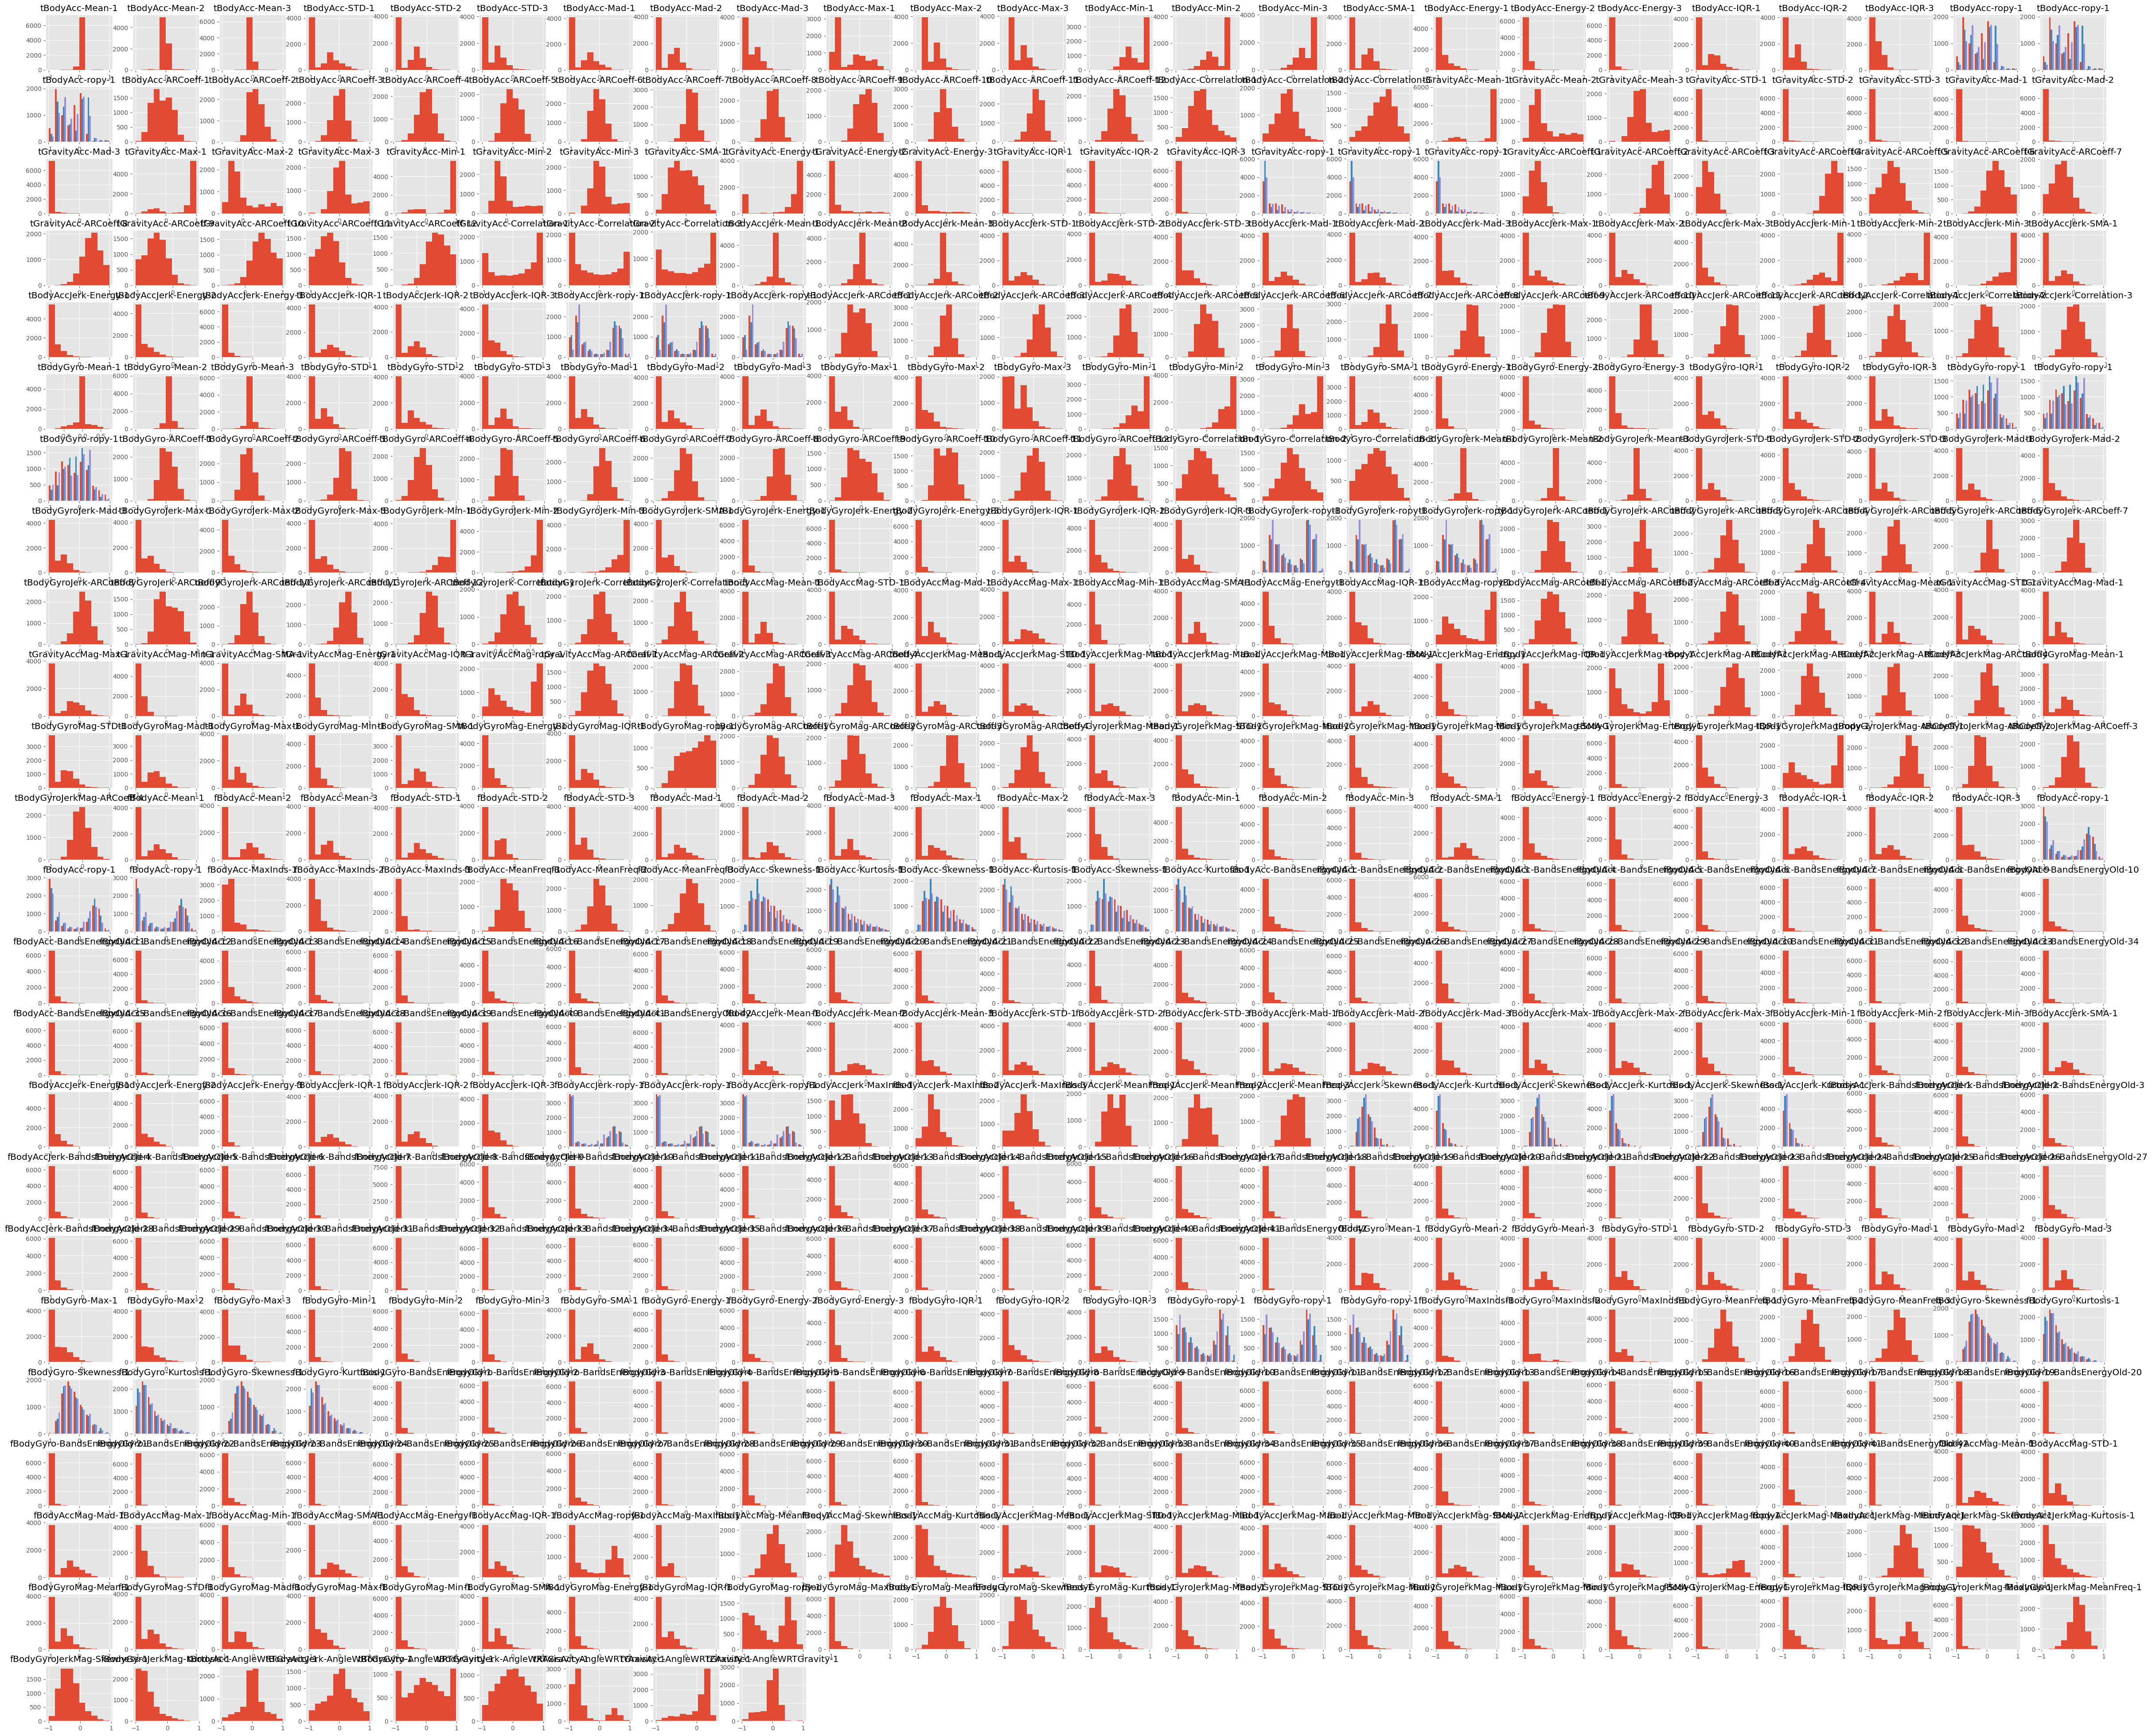

In [ ]:
plt.rcParams['figure.figsize'] = (60, 50)
plt.style.use('ggplot')

X_train.hist()
plt.show()

### PCA
se hace una reduccion de caracteristicas de 561 columnas a solo 3 por medio de PCA util para reducir el número de columnas o variables del DataFrame, mientras se mantiene la mayor cantidad posible de información relevante. En otras palabras, se trata de una técnica para reducir la dimensionalidad del conjunto de datos sin perder demasiada información.

In [ ]:
from sklearn.decomposition import PCA
opcionEscalado=1
numeroComponentes=3
pca=PCA(n_components=numeroComponentes)
pca.fit(X_train)
transformada=pca.transform(X_train)

pca2=PCA(n_components=numeroComponentes)
pca2.fit(X_test)
transformada_test = pca2.transform(X_test)

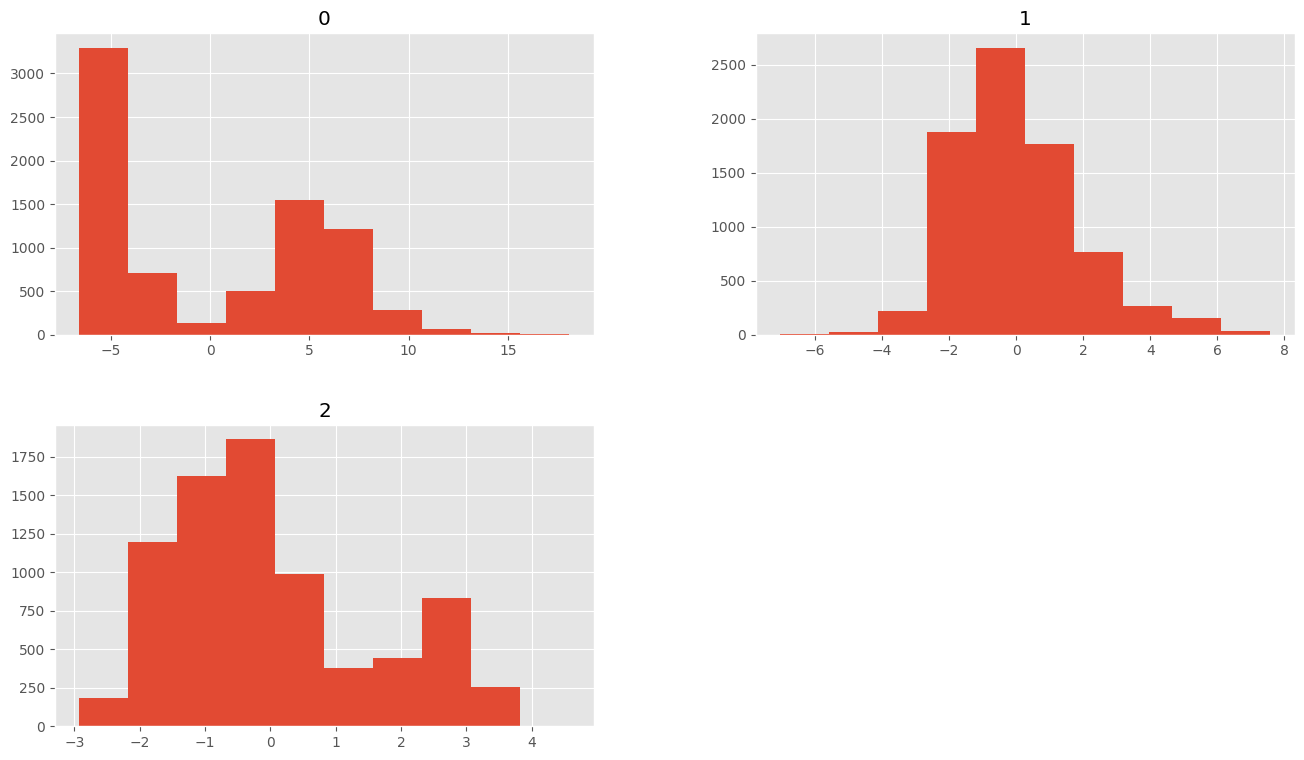

In [ ]:
transformada = df = pd.DataFrame(transformada)
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
transformada.hist()
plt.show()


la ditribucion que maneja el nuevo dataset reducido a 3 columnas 

# implementacion modelos

## Modelo I -> SVM

In [ ]:
modelo=SVC()
#modelo.fit(X_train, y_train)
modelo.fit(X_train,y_train)
yPredict=modelo.predict(X_test)
print("Accruracy=",metrics.accuracy_score(y_test, yPredict))

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accruracy= 0.9367288832647896


Generamos a matriz de confusion 

In [ ]:
matriz=confusion_matrix(y_test,yPredict)
print(matriz)

[[489   4   3   0   0   0   0   0   0   0   0   0]
 [ 22 449   0   0   0   0   0   0   0   0   0   0]
 [ 10  26 384   0   0   0   0   0   0   0   0   0]
 [  0   3   0 454  51   0   0   0   0   0   0   0]
 [  0   0   0  29 526   0   0   0   0   0   0   0]
 [  0   0   0   0   0 545   0   0   0   0   0   0]
 [  0   2   0   2   0   0  18   0   1   0   0   0]
 [  0   0   0   0   0   0   2   8   0   0   0   0]
 [  0   0   0   0   0   0   0   0  28   0   4   0]
 [  0   0   0   0   0   0   0   0   1  18   0   6]
 [  1   2   0   2   0   2   1   0  14   0  27   0]
 [  1   0   0   0   0   0   0   0   0   9   2  15]]


In [ ]:
precision_recall_fscore_support(y_test,yPredict, average=None)
target_names = etiquetas_y
print(classification_report(y_test,yPredict, target_names=target_names))

                      precision    recall  f1-score   support

           1 WALKING       0.93      0.99      0.96       496
  2 WALKING_UPSTAIRS       0.92      0.95      0.94       471
3 WALKING_DOWNSTAIRS       0.99      0.91      0.95       420
           4 SITTING       0.93      0.89      0.91       508
          5 STANDING       0.91      0.95      0.93       555
            6 LAYING       1.00      1.00      1.00       545
      7 STAND_TO_SIT       0.86      0.78      0.82        23
      8 SIT_TO_STAND       1.00      0.80      0.89        10
        9 SIT_TO_LIE       0.64      0.88      0.74        32
       10 LIE_TO_SIT       0.67      0.72      0.69        25
     11 STAND_TO_LIE       0.82      0.55      0.66        49
     12 LIE_TO_STAND       0.71      0.56      0.63        27

            accuracy                           0.94      3161
           macro avg       0.87      0.83      0.84      3161
        weighted avg       0.94      0.94      0.94      3161



### Prueba kernel polinomial

In [ ]:
modelo=SVC(kernel='poly')
modelo.fit(X_train,y_train)
yPredict=modelo.predict(X_test)
print("Accuracy =",metrics.accuracy_score(y_test,yPredict))
matriz=confusion_matrix(y_test,yPredict)
print(matriz) 
# sns.heatmap(matriz,annot=True,cmap="Blues")

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy = 0.945586839607719
[[489   4   3   0   0   0   0   0   0   0   0   0]
 [ 24 446   1   0   0   0   0   0   0   0   0   0]
 [  8  21 391   0   0   0   0   0   0   0   0   0]
 [  0   3   0 452  52   0   0   1   0   0   0   0]
 [  0   0   0  15 540   0   0   0   0   0   0   0]
 [  0   0   0   0   0 545   0   0   0   0   0   0]
 [  0   1   0   2   0   0  18   0   1   0   1   0]
 [  0   0   0   0   0   0   0  10   0   0   0   0]
 [  0   0   0   0   0   0   0   0  26   0   6   0]
 [  0   0   0   0   0   0   0   0   0  20   0   5]
 [  1   0   0   1   0   1   0   0  11   0  35   0]
 [  0   0   0   0   0   0   0   0   0   6   4  17]]


In [ ]:
precision_recall_fscore_support(y_test,yPredict, average=None)
target_names = etiquetas_y
print(classification_report(y_test,yPredict, target_names=target_names))

                      precision    recall  f1-score   support

           1 WALKING       0.94      0.99      0.96       496
  2 WALKING_UPSTAIRS       0.94      0.95      0.94       471
3 WALKING_DOWNSTAIRS       0.99      0.93      0.96       420
           4 SITTING       0.96      0.89      0.92       508
          5 STANDING       0.91      0.97      0.94       555
            6 LAYING       1.00      1.00      1.00       545
      7 STAND_TO_SIT       1.00      0.78      0.88        23
      8 SIT_TO_STAND       0.91      1.00      0.95        10
        9 SIT_TO_LIE       0.68      0.81      0.74        32
       10 LIE_TO_SIT       0.77      0.80      0.78        25
     11 STAND_TO_LIE       0.76      0.71      0.74        49
     12 LIE_TO_STAND       0.77      0.63      0.69        27

            accuracy                           0.95      3161
           macro avg       0.89      0.87      0.88      3161
        weighted avg       0.95      0.95      0.95      3161



### prueba kernel RBF

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy = 0.9367288832647896
[[489   4   3   0   0   0   0   0   0   0   0   0]
 [ 22 449   0   0   0   0   0   0   0   0   0   0]
 [ 10  26 384   0   0   0   0   0   0   0   0   0]
 [  0   3   0 454  51   0   0   0   0   0   0   0]
 [  0   0   0  29 526   0   0   0   0   0   0   0]
 [  0   0   0   0   0 545   0   0   0   0   0   0]
 [  0   2   0   2   0   0  18   0   1   0   0   0]
 [  0   0   0   0   0   0   2   8   0   0   0   0]
 [  0   0   0   0   0   0   0   0  28   0   4   0]
 [  0   0   0   0   0   0   0   0   1  18   0   6]
 [  1   2   0   2   0   2   1   0  14   0  27   0]
 [  1   0   0   0   0   0   0   0   0   9   2  15]]


<Axes: >

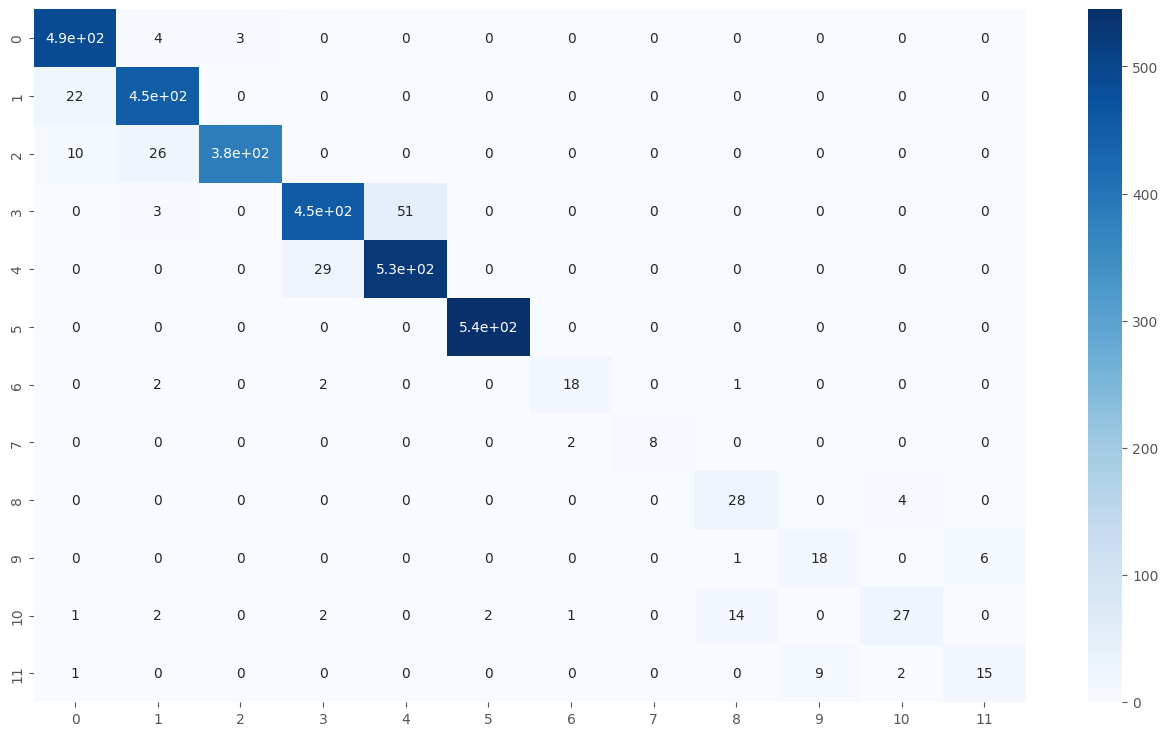

In [ ]:
modelo=SVC(kernel='rbf')
modelo.fit(X_train,y_train)
yPredict=modelo.predict(X_test)
print("Accuracy =",metrics.accuracy_score(y_test,yPredict))
matriz=confusion_matrix(y_test,yPredict)
print(matriz) 
sns.heatmap(matriz,annot=True,cmap="Blues")

In [ ]:
precision_recall_fscore_support(y_test,yPredict, average=None)
target_names = etiquetas_y
print(classification_report(y_test,yPredict, target_names=target_names))

                      precision    recall  f1-score   support

           1 WALKING       0.93      0.99      0.96       496
  2 WALKING_UPSTAIRS       0.92      0.95      0.94       471
3 WALKING_DOWNSTAIRS       0.99      0.91      0.95       420
           4 SITTING       0.93      0.89      0.91       508
          5 STANDING       0.91      0.95      0.93       555
            6 LAYING       1.00      1.00      1.00       545
      7 STAND_TO_SIT       0.86      0.78      0.82        23
      8 SIT_TO_STAND       1.00      0.80      0.89        10
        9 SIT_TO_LIE       0.64      0.88      0.74        32
       10 LIE_TO_SIT       0.67      0.72      0.69        25
     11 STAND_TO_LIE       0.82      0.55      0.66        49
     12 LIE_TO_STAND       0.71      0.56      0.63        27

            accuracy                           0.94      3161
           macro avg       0.87      0.83      0.84      3161
        weighted avg       0.94      0.94      0.94      3161



### PCA

In [ ]:
modelo=SVC()
modelo.fit(transformada,y_train)
yPredict=modelo.predict(transformada_test)
print("Accuracy =",metrics.accuracy_score(y_test,yPredict))
matriz=confusion_matrix(y_test,yPredict)
print(matriz) 
# sns.heatmap(matriz,annot=True,cmap="Blues")

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy = 0.7291996203732996
[[446   1  49   0   0   0   0   0   0   0   0   0]
 [ 55 371  45   0   0   0   0   0   0   0   0   0]
 [218  32 170   0   0   0   0   0   0   0   0   0]
 [  0   1   0 298 203   4   0   0   2   0   0   0]
 [  1   3   0 116 435   0   0   0   0   0   0   0]
 [  0   0   0  16   0 529   0   0   0   0   0   0]
 [  0   9   0   0   0   0   0   0  10   0   4   0]
 [  0   1   0   0   0   0   0   0   7   2   0   0]
 [  0   1   0   0   0   0   0   0  14   6   5   6]
 [  0   0   0   0   0   1   0   0   1  16   0   7]
 [  0  11   0   0   1   1   0   0  14   8  13   1]
 [  0   1   0   0   0   0   0   0   0  12   1  13]]


In [ ]:
precision_recall_fscore_support(y_test,yPredict, average=None)
target_names = etiquetas_y
print(classification_report(y_test,yPredict, target_names=target_names))

                      precision    recall  f1-score   support

           1 WALKING       0.62      0.90      0.73       496
  2 WALKING_UPSTAIRS       0.86      0.79      0.82       471
3 WALKING_DOWNSTAIRS       0.64      0.40      0.50       420
           4 SITTING       0.69      0.59      0.64       508
          5 STANDING       0.68      0.78      0.73       555
            6 LAYING       0.99      0.97      0.98       545
      7 STAND_TO_SIT       0.00      0.00      0.00        23
      8 SIT_TO_STAND       0.00      0.00      0.00        10
        9 SIT_TO_LIE       0.29      0.44      0.35        32
       10 LIE_TO_SIT       0.36      0.64      0.46        25
     11 STAND_TO_LIE       0.57      0.27      0.36        49
     12 LIE_TO_STAND       0.48      0.48      0.48        27

            accuracy                           0.73      3161
           macro avg       0.52      0.52      0.50      3161
        weighted avg       0.73      0.73      0.72      3161



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

## Modelo II -> KNN

In [ ]:
modelo=KNeighborsClassifier(n_neighbors=1)
modelo.fit(X_train,y_train)
yPredict=modelo.predict(X_test)


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print("Accuracy =",metrics.accuracy_score(y_test,yPredict))
matriz=confusion_matrix(y_test,yPredict)
print(matriz) 
# sns.heatmap(matriz,annot=True,cmap="Blues")

Accuracy = 0.6700411262258779
[[424  19  53   0   0   0   0   0   0   0   0   0]
 [ 85 280 100   2   0   0   1   0   0   0   2   1]
 [188  79 153   0   0   0   0   0   0   0   0   0]
 [  0   1   0 336 160   8   0   1   1   0   1   0]
 [  0   3   0 190 361   0   1   0   0   0   0   0]
 [  0   0   0  25   0 518   0   0   0   1   1   0]
 [  0   6   0   1   0   0   0   0   5   0  10   1]
 [  0   0   0   1   0   0   0   4   4   1   0   0]
 [  0   0   0   0   0   3   0   0  11   4   8   6]
 [  0   0   0   0   0   1   0   0   0  13   1  10]
 [  1   8   0   0   1   3   0   0  16   1  11   8]
 [  0   1   0   0   0   1   0   0   2  16   0   7]]


In [ ]:
precision_recall_fscore_support(y_test,yPredict, average=None)
target_names = etiquetas_y
print(classification_report(y_test,yPredict, target_names=target_names))

                      precision    recall  f1-score   support

           1 WALKING       0.61      0.85      0.71       496
  2 WALKING_UPSTAIRS       0.71      0.59      0.65       471
3 WALKING_DOWNSTAIRS       0.50      0.36      0.42       420
           4 SITTING       0.61      0.66      0.63       508
          5 STANDING       0.69      0.65      0.67       555
            6 LAYING       0.97      0.95      0.96       545
      7 STAND_TO_SIT       0.00      0.00      0.00        23
      8 SIT_TO_STAND       0.80      0.40      0.53        10
        9 SIT_TO_LIE       0.28      0.34      0.31        32
       10 LIE_TO_SIT       0.36      0.52      0.43        25
     11 STAND_TO_LIE       0.32      0.22      0.27        49
     12 LIE_TO_STAND       0.21      0.26      0.23        27

            accuracy                           0.67      3161
           macro avg       0.50      0.49      0.48      3161
        weighted avg       0.67      0.67      0.66      3161



### PCA

In [ ]:
modelo=KNeighborsClassifier(n_neighbors=1)
modelo.fit(transformada,y_train)
yPredict=modelo.predict(transformada_test)


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print("Accuracy =",metrics.accuracy_score(y_test,yPredict))
matriz=confusion_matrix(y_test,yPredict)
print(matriz) 

Accuracy = 0.6700411262258779
[[424  19  53   0   0   0   0   0   0   0   0   0]
 [ 85 280 100   2   0   0   1   0   0   0   2   1]
 [188  79 153   0   0   0   0   0   0   0   0   0]
 [  0   1   0 336 160   8   0   1   1   0   1   0]
 [  0   3   0 190 361   0   1   0   0   0   0   0]
 [  0   0   0  25   0 518   0   0   0   1   1   0]
 [  0   6   0   1   0   0   0   0   5   0  10   1]
 [  0   0   0   1   0   0   0   4   4   1   0   0]
 [  0   0   0   0   0   3   0   0  11   4   8   6]
 [  0   0   0   0   0   1   0   0   0  13   1  10]
 [  1   8   0   0   1   3   0   0  16   1  11   8]
 [  0   1   0   0   0   1   0   0   2  16   0   7]]


In [ ]:
precision_recall_fscore_support(y_test,yPredict, average=None)
target_names = etiquetas_y
print(classification_report(y_test,yPredict, target_names=target_names))

                      precision    recall  f1-score   support

           1 WALKING       0.61      0.85      0.71       496
  2 WALKING_UPSTAIRS       0.71      0.59      0.65       471
3 WALKING_DOWNSTAIRS       0.50      0.36      0.42       420
           4 SITTING       0.61      0.66      0.63       508
          5 STANDING       0.69      0.65      0.67       555
            6 LAYING       0.97      0.95      0.96       545
      7 STAND_TO_SIT       0.00      0.00      0.00        23
      8 SIT_TO_STAND       0.80      0.40      0.53        10
        9 SIT_TO_LIE       0.28      0.34      0.31        32
       10 LIE_TO_SIT       0.36      0.52      0.43        25
     11 STAND_TO_LIE       0.32      0.22      0.27        49
     12 LIE_TO_STAND       0.21      0.26      0.23        27

            accuracy                           0.67      3161
           macro avg       0.50      0.49      0.48      3161
        weighted avg       0.67      0.67      0.66      3161

